# Global Fishing Detection

### With every passing year, more alarms are raised about the effects of climate change and human activity that threaten the survival of thousands of marine and land species and forces us to become more sustainable

### The goal of this project is to detect and predict the effects and events of commercial shipping , in particular to detect fishing events as they occur around the oceans as an effort to analyze shipping and fishing patterns in order to protect marine life , preserve protected areas , and prevent poaching and illegal fishing that threatens marine and ecological integrity

### Using data from the global fishing watch , an NGO dedicated to monitor marine life and commercial shipping and shipment, our goal is to build a machine learning model that can predict fishing events of ships around the world using AIS ( Automatic Identification System ) data that bears important information about each ship, including speed , distance from shore , and location

## https://globalfishingwatch.org/about-us/ 

### The ultimate goal and evolution of this project would be to create a real time system that detects fishing events via satalite  and analyzes shipment patterns to render transshipment , trade , and fishing more sustainable

### We start with some definitions and the schema of our data set

#### MMSI : Maritime Mobile Service Identity ; nine digits which are sent in digital form over a radio frequency channel in order to uniquely identify ship stations, ship earth stations, coast stations, coast earth stations, and group calls

#### AIS : Automatic Identification System transmits a ship’s position so that other ships are aware of its position

###### mmsi: Anonymized vessel identifier
###### timestamp: Unix timestamp
###### distance_from_shore: Distance from shore (meters)
###### distance_from_port: Distance from port (meters)
###### speed: Vessel speed (knots)
###### course: Vessel course
###### lat: Latitude in decimal degrees
###### lon: Longitude in decimal degrees
###### is_fishing: Label indicating fishing activity.
###### 0 = Not fishing
###### >0 = Fishing. Data values between 0 and 1 indicate the average score for the position if scored by multiple people.
###### -1 = No data


##### You can find the datasets that we will be using in the link below and on the Global Fishing Watch Website

https://drive.google.com/file/d/1S8E4506u03DvOk9whmCnzoGmP-5pPdfw/view?usp=sharing

### And now let's start coding!

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [11]:
def join( df1 , df2 , commonCol):
  return pd.merge(df1,df2,on=commonCol,how='outer')

def union( df1 , df2 ):
  return pd.concat([df1,df2], axis =0)

def minus( df1 , df2 , column ):
  cond = df1[column].isin(df2[column])
  df1.drop(df1[cond].index, inplace = True)
    
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr,  cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 } )
    


In [12]:
df  = pd.read_csv('trollers.csv')
df.head()


,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
0,7.652701e+13,1.337836e+09,0.0,3162.200195,0.0,0.000000,51.887592,4.356583,-1.0,gfw
1,7.652701e+13,1.338199e+09,0.0,4999.877441,0.0,0.000000,51.242130,4.403008,-1.0,gfw
2,7.652701e+13,1.343752e+09,0.0,66308.250000,8.6,292.200012,51.960873,5.196125,-1.0,gfw
3,7.652701e+13,1.350795e+09,0.0,15296.682617,0.0,0.000000,51.231094,4.526647,-1.0,gfw
4,7.652701e+13,1.351808e+09,0.0,15296.682617,0.0,0.000000,51.231098,4.526487,-1.0,gfw


In [14]:
df2 = pd.read_csv('pole_and_line.csv')
df3 = pd.read_csv('fixed_gear.csv')
df4 = pd.read_csv('purse_seines.csv')
df5 = pd.read_csv('trawlers.csv')


df = pd.concat([df,df2 , df3 , df4], axis =0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6697793 entries, 0 to 1545322
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   mmsi                 float64
 1   timestamp            float64
 2   distance_from_shore  float64
 3   distance_from_port   float64
 4   speed                float64
 5   course               float64
 6   lat                  float64
 7   lon                  float64
 8   is_fishing           float64
 9   source               object 
dtypes: float64(9), object(1)
memory usage: 562.1+ MB


In [17]:
df_reduced =  df[ df['is_fishing'] != -1 ]
df_reduced['is_fishing'].describe()


count    145759.000000
mean          0.228626
std           0.412687
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_fishing, dtype: float64

In [18]:
df_undef =  df_reduced [ ( df_reduced['is_fishing']<1 ) & ( df_reduced['is_fishing']>0 ) ] 
# df_undef['is_fishing'] = 1
df_undef = df_undef.assign(is_fishing = 1 )
df_undef

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
3610,7.652701e+13,1.433159e+09,8944.052734,19999.509766,6.9,244.399994,38.306725,15.394240,1,gfw
3611,7.652701e+13,1.433160e+09,12529.657227,20517.781250,6.8,12.100000,38.324276,15.378206,1,gfw
3612,7.652701e+13,1.433160e+09,11661.617188,23344.662109,7.1,59.799999,38.334198,15.395231,1,gfw
3615,7.652701e+13,1.433165e+09,3605.462891,18357.109375,6.9,59.599998,38.312866,15.480063,1,gfw
3616,7.652701e+13,1.433165e+09,3605.462891,18787.832031,6.7,52.099998,38.319057,15.490622,1,gfw
...,...,...,...,...,...,...,...,...,...,...
1276006,2.679667e+14,1.449006e+09,6999.828125,30264.748047,9.2,184.199997,37.914879,24.108997,1,gfw
1276068,2.679667e+14,1.449097e+09,2236.013184,15296.682617,8.8,182.699997,37.805088,24.097570,1,gfw
1276069,2.679667e+14,1.449097e+09,2236.013184,15296.682617,9.3,179.000000,37.802132,24.097578,1,gfw
1276070,2.679667e+14,1.449098e+09,1414.178833,9486.599609,9.1,190.100006,37.762844,24.092457,1,gfw


In [19]:
df_undef['is_fishing'].describe()

count    4165.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: is_fishing, dtype: float64

### Replace any is_shipping value between 1 and 0 with 1 

In [21]:
minus( df_reduced , df_undef , 'mmsi' )
df_reduced = union(df_reduced , df_undef)

<AxesSubplot:xlabel='is_fishing', ylabel='Count'>

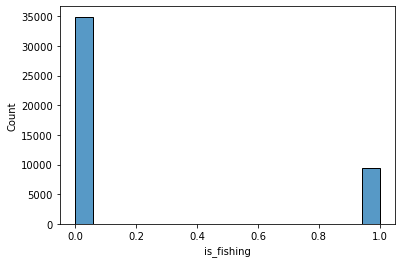

In [22]:
sns.histplot( x = 'is_fishing' , data = df_reduced )

### Checking for any null values


In [23]:
df_reduced.isnull().sum().sum()

0

### Correlation Map between variables to deduce corelations

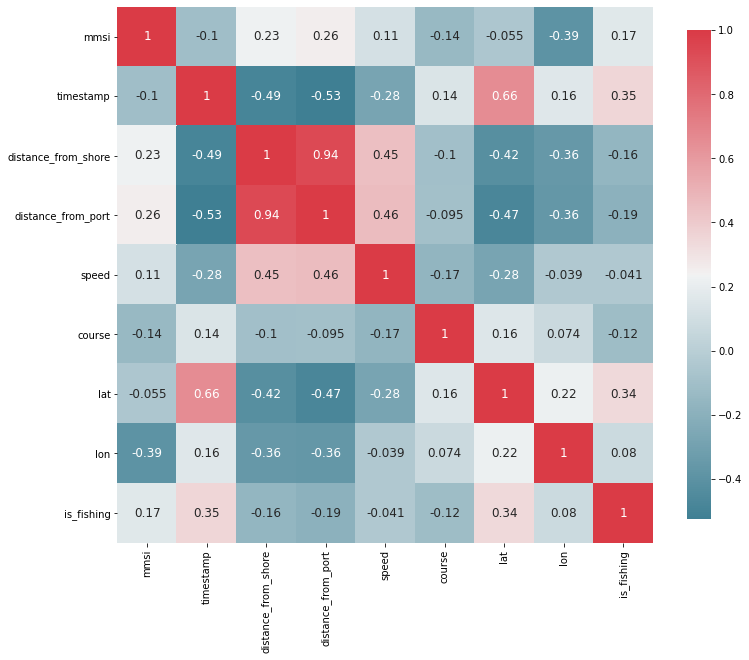

In [24]:
plot_correlation_map(df_reduced)

## Corelation Map Analysis 

#### It is apparent that the features with greatest influence on whether a ship is a fishing at a time instant are the latitude ( the location in general ) , the time stamp , the distance from port and from shore. The MMSI will be avoided from the analysis to avoid overfitting of data 

#### These features will be more deeply investigated 

Latitude and Longtitude as a combined column

In [54]:
df_reduced['location'] = list(zip(df_reduced.lat, df_reduced.lon))
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22184 entries, 59619 to 1276071
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mmsi                 22184 non-null  float64
 1   timestamp            22184 non-null  float64
 2   distance_from_shore  22184 non-null  float64
 3   distance_from_port   22184 non-null  float64
 4   speed                22184 non-null  float64
 5   course               22184 non-null  float64
 6   lat                  22184 non-null  float64
 7   lon                  22184 non-null  float64
 8   is_fishing           22184 non-null  float64
 9   source               22184 non-null  object 
 10  location             22184 non-null  object 
dtypes: float64(9), object(2)
memory usage: 2.0+ MB


### Data covers AIS tracking information of 72 unique vessels 

In [134]:
len(df_reduced['mmsi'].unique())

72

### Investigating the corelation between the most relevant features and is_fishing 

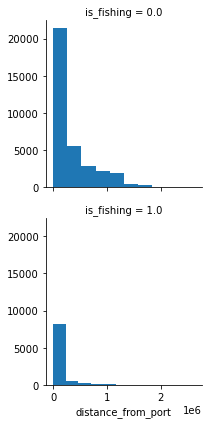

In [27]:
grid = sns.FacetGrid(df_reduced, row='is_fishing')
grid.map(plt.hist, 'distance_from_port' , bins = 10)
plt.show()

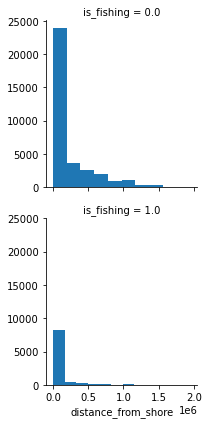

In [28]:
grid = sns.FacetGrid(df_reduced, row='is_fishing')
grid.map(plt.hist, 'distance_from_shore' , bins = 10)
plt.show()

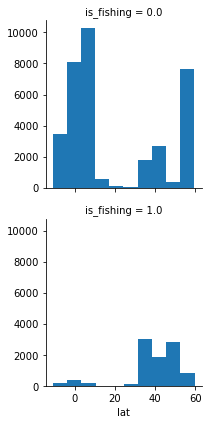

In [30]:
grid = sns.FacetGrid(df_reduced, row='is_fishing')
grid.map(plt.hist, 'lat' , bins = 10)
plt.show()

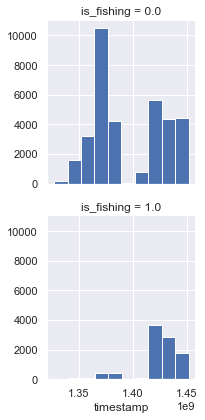

In [71]:
grid = sns.FacetGrid(df_reduced, row='is_fishing')
grid.map(plt.hist, 'timestamp' , bins = 10 )
plt.show()

#### Converting Unix Time stamp to DateTime

In [31]:
df_reduced['timestamp']

59619      1.432145e+09
59620      1.432146e+09
59621      1.432147e+09
59622      1.432148e+09
59623      1.432149e+09
               ...     
1276006    1.449006e+09
1276068    1.449097e+09
1276069    1.449097e+09
1276070    1.449098e+09
1276071    1.449099e+09
Name: timestamp, Length: 44235, dtype: float64

In [34]:
df_reduced['date'] = pd.to_datetime(df_reduced['timestamp'], unit='s')


### Data covers years [ 2013 - 2015 ] 

<AxesSubplot:xlabel='year', ylabel='Count'>

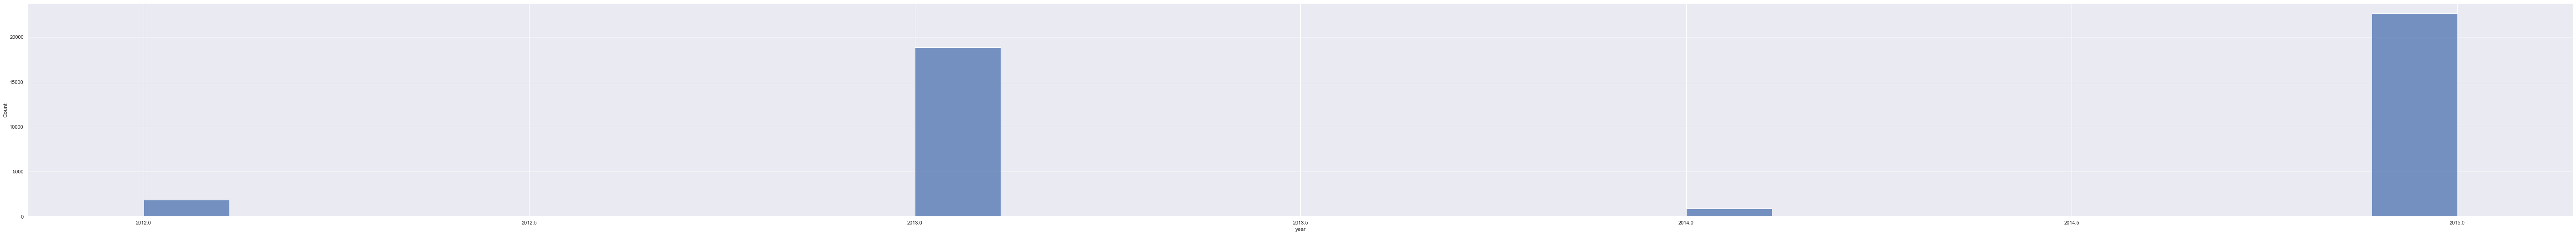

In [81]:
df_reduced['year'] = pd.DatetimeIndex(df_reduced['date']).year
sns.histplot( x = 'year' , data = df_reduced)

In [91]:
df_reduced['weekday'] = pd.DatetimeIndex(df_reduced['date']).weekday
df_reduced['day'] = pd.DatetimeIndex(df_reduced['date']).day
df_reduced['month'] = pd.DatetimeIndex(df_reduced['date']).month
df_reduced['hour'] = pd.DatetimeIndex(df_reduced['date']).hour


### Analysis of fishing activity during weekdays

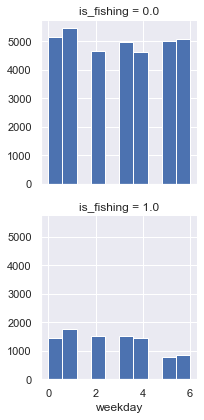

In [86]:
grid = sns.FacetGrid(df_reduced, row='is_fishing')
grid.map(plt.hist, 'weekday')
plt.show()

### Analysis of fishing activity during month days

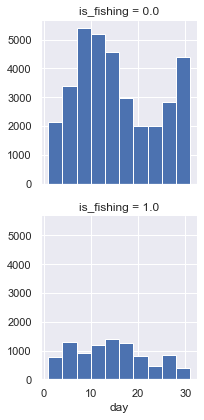

In [87]:
grid = sns.FacetGrid(df_reduced, row='is_fishing')
grid.map(plt.hist, 'day')
plt.show()

### Analysis of fishing activity during months

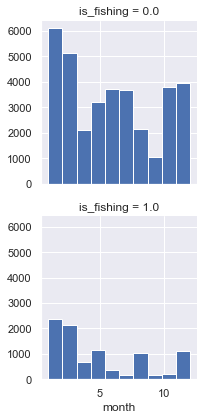

In [89]:
grid = sns.FacetGrid(df_reduced, row='is_fishing')
grid.map(plt.hist, 'month')
plt.show()

### Analysis of fishing activity during years 

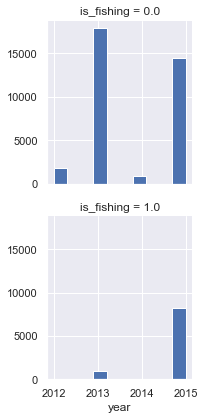

In [90]:
grid = sns.FacetGrid(df_reduced, row='is_fishing')
grid.map(plt.hist, 'year')
plt.show()

### Analysis of fishing activity during hours of the day

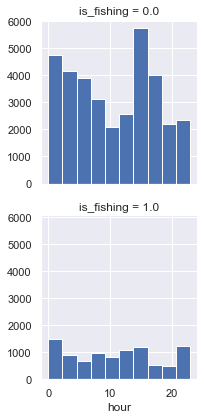

In [92]:
grid = sns.FacetGrid(df_reduced, row='is_fishing')
grid.map(plt.hist, 'hour')
plt.show()

### Data Analysis
#### Atfer visualizing the data , we can see that we have two types of features that affect our target:
   ##### Spatial : distance from shore and port and latitude
   ##### Temporal : the timestamp 
#### And we can deduce from the visualization that the date , day , hour ,  month , and year ( extracted from the time stamp ) affect our target signaficantly more than the other features. However using the year may result in overfitting , as our range of years is small and most of the data points belong to either 2015 or 2013.

#### So the recommended selected features for training our machine learning model will be :                                                                        1- distance_from_shore       2- distance_from_port    3- latitude     4- date  5- day  6- hour  7- month 

#### We can also choose to select latitude , since the existence of longtitude implies the presence of location which implies that the lattitude must affect our data ; in addition to the fact that neglecting lattitudes and relying solely on longtitudes may result in overfitting

#### We can also choose to select speed , since it is an important behavorial aspect , even if it has a week corelation with our target 

#### So we add   8- longtitude and 9- speed to our set of features and we move on to select our machine learning model


### Feature Selection 
1- distance_from_shore 
2- distance_from_port 
3- latitude 
4- date 
5- day 
6- hour 
7- month 
8- longtitude
9- speed

## Model Selection

#### Since our target is categorical , we are inclined to opt for logistic regression and random forests. Using random forests will limit the risk of overfitting , while using logistic regression will cut execution time and resource usage , while still giving an approximation of our target

### Logistic Regression

In [97]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [109]:
model = LogisticRegression( max_iter=1000)
df_reduced['weekday'] = df_reduced['weekday'].astype(int)
df_reduced['day'] = df_reduced['day'].astype(int)
df_reduced['hour'] = df_reduced['hour'].astype(int)
df_reduced['month'] = df_reduced['month'].astype(int)

x = df_reduced[ ['distance_from_shore' , 'distance_from_port' , 'lat' , 'weekday' , 'day' , 'hour' , 'month' , 'lon' , 'speed'  ] ]
scores = cross_val_score( model , x , df_reduced['is_fishing'] , cv = 5 )



In [119]:
print ( 'Accuracy of k folds' ,    scores ) 
print( 'Average Score' , sum(scores)/5 )

Accuracy of k folds [0.60472477 0.8128179  0.64146038 0.78795072 0.81959986]
Average Score 0.7333107268000452


##### Testing using confusion matrix


In [112]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict( model , x , df_reduced['is_fishing'] , cv = 5 )
conf_mat = confusion_matrix(df_reduced['is_fishing'], y_pred)

<AxesSubplot:>

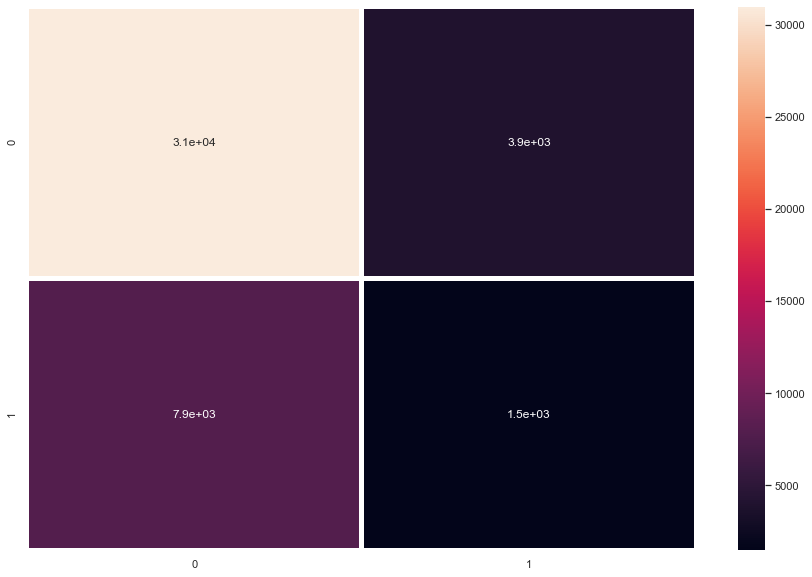

In [118]:

plt.subplots(figsize=(15,10))

sns.heatmap(conf_mat, annot=True , linewidths=4)


##### Testing using more folds

Accuracy of k folds [0.52373418 0.73530741 0.80673599 0.82504521 0.79950271 0.44517296
 0.78250057 0.82229256 0.83789283 0.82251865]
Average Score 0.7400703069071379


<AxesSubplot:>

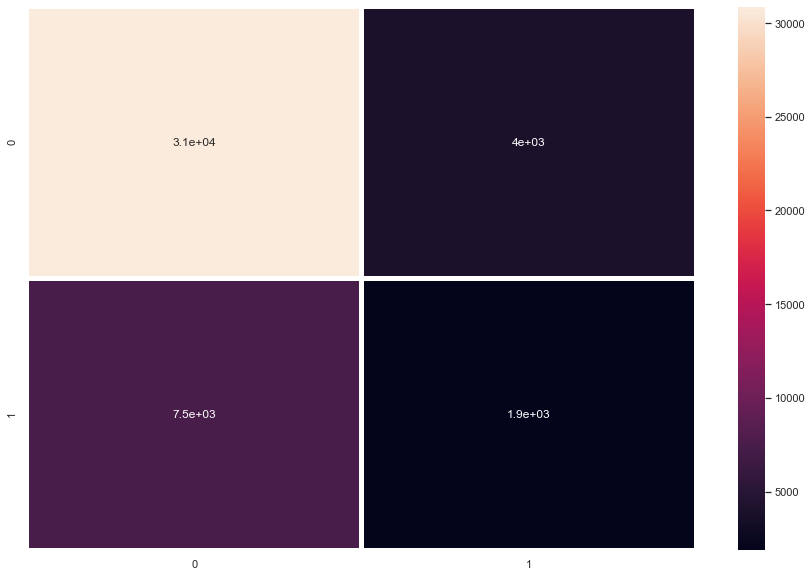

In [121]:
scores = cross_val_score( model , x , df_reduced['is_fishing'] , cv = 10 )
y_pred = cross_val_predict( model , x , df_reduced['is_fishing'] , cv = 10 )
conf_mat = confusion_matrix(df_reduced['is_fishing'], y_pred)
print ( 'Accuracy of k folds' , scores ) 
print( 'Average Score' , sum(scores)/10 )

plt.subplots(figsize=(15,10))

sns.heatmap(conf_mat, annot=True , linewidths=4)


In [123]:
dataSize = len(df_reduced)
dataSize

44235

In [125]:
print('False Negative Ratio' , 7500/dataSize)
print('False Positive Ratio' , 4000/dataSize)

False Negative Ratio 0.169548999660902
False Positive Ratio 0.09042613315248106


## Logistic Regression Analaysis 
#### On the 10 fold scale , the model had an average accuracy of 77% and a top accuracy of 83.7% , and a fascinating False Negative Ratio of just 16% , which is one of the most important metrics in our case, since we are trying to detect every single fishing event that happens particulary in endagered zones. 

#### The model can be deemed successful and is expected to perform better on larger datasets with more AIS signals and covering longer time spaces

## Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier 
model2 = RandomForestClassifier( n_estimators = 20 )

scores = cross_val_score( model2 , x , df_reduced['is_fishing'] , cv = 10 )
print ( 'Accuracy of k folds' ,    scores ) 


Accuracy of k folds [0.99977396 0.99977396 0.99706148 1.         0.9988698  0.98326927
 0.99954782 1.         1.         1.        ]
Average Score 1.9956592593622275


In [128]:
print( 'Average Score' , sum(scores)/10 )

Average Score 0.9978296296811138


##### Increasing estimators to avoid overfitting

In [129]:
model3 = RandomForestClassifier( n_estimators = 60 )

scores = cross_val_score( model2 , x , df_reduced['is_fishing'] , cv = 10 )
print ( 'Accuracy of k folds' ,scores ) 


Accuracy of k folds [1.         1.         0.99728752 1.         0.99841772 0.98779109
 0.99954782 1.         1.         1.        ]


In [130]:
print( 'Average Score' , sum(scores)/10 )

Average Score 0.9983044154364883


### Random Forest Analysis 
#### With an average score of 99.8 , we should excercise caution with the data as we may experience overfitting when dealing with larger and more variant datasets ; however that does not diminish the success of the model with some accuracy rates reaching almost 100% ! 

#### Another downpoint of the random forest analysis was the execution time that lasted about 8 seconds , which may cause perfomance issues on larger datasets in real time systems that detect fishing events around the globe

# Conclusion & Recommendations

### We can conclude that we can build an effective machine learning model to predict fishing events. We have used  Logistic Regression and Random Forest to predict the is_shippinng field with an average accuracy of 73% and 99% respectivly

### We can now test on larger datasets and start building our real time system that can be upgraded to run on live satelite data 

### Moreover there are other important patterns that we can find in our data, such as shipping patterns that we can use to optimize shipping both financially and ecologically ,  predicting the model and gear type of vessels to better predict shipping events , and analyzing vessel encounters to better understand shipping routines 